In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv("./hapiness_report_2022.csv", index_col=None)
df = df.sort_values("score").reset_index(drop=True)
df.head(5)

country  score               income
0  Afghanistan  2.404           Low income
1      Lebanon  2.955  Lower middle income
2     Zimbabwe  2.995  Lower middle income
3       Rwanda  3.268           Low income
4     Botswana  3.471  Upper middle income

In [3]:
country_name_to_iso3166_1_alpha_2 = {
    "Afghanistan": "AF",
    "Albania": "AL",
    "Algeria": "DZ",
    "American Samoa": "AS",
    "Andorra": "AD",
    "Angola": "AO",
    "Anguilla": "AI",
    "Antarctica": "AQ",
    "Antigua and Barbuda": "AG",
    "Argentina": "AR",
    "Armenia": "AM",
    "Aruba": "AW",
    "Australia": "AU",
    "Austria": "AT",
    "Azerbaijan": "AZ",
    "Bahamas": "BS",
    "Bahrain": "BH",
    "Bangladesh": "BD",
    "Barbados": "BB",
    "Belarus": "BY",
    "Belgium": "BE",
    "Belize": "BZ",
    "Benin": "BJ",
    "Bermuda": "BM",
    "Bhutan": "BT",
    "Bolivia": "BO",
    "Bonaire, Sint Eustatius and Saba": "BQ",
    "Bosnia and Herzegovina": "BA",
    "Kosovo": "BA",
    "Botswana": "BW",
    "Bouvet Island": "BV",
    "Brazil": "BR",
    "British Indian Ocean Territory": "IO",
    "Brunei Darussalam": "BN",
    "Bulgaria": "BG",
    "Burkina Faso": "BF",
    "Burundi": "BI",
    "Cambodia": "KH",
    "Cameroon": "CM",
    "Canada": "CA",
    "Cape Verde": "CV",
    "Cayman Islands": "KY",
    "Central African Republic": "CF",
    "Chad": "TD",
    "Chile": "CL",
    "China": "CN",
    "Christmas Island": "CX",
    "Cocos (Keeling) Islands": "CC",
    "Colombia": "CO",
    "Comoros": "KM",
    "Congo": "CG",
    "Congo Kinshasa": "CD",
    "Cook Islands": "CK",
    "Costa Rica": "CR",
    "Croatia": "HR",
    "Cuba": "CU",
    "Curaçao": "CW",
    "Cyprus": "CY",
    "Czech Republic": "CZ",
    "Ivory Coast": "CI",
    "Denmark": "DK",
    "Djibouti": "DJ",
    "Dominica": "DM",
    "Dominican Republic": "DO",
    "Ecuador": "EC",
    "Egypt": "EG",
    "El Salvador": "SV",
    "Equatorial Guinea": "GQ",
    "Eritrea": "ER",
    "Estonia": "EE",
    "Ethiopia": "ET",
    "Eswatini": "SZ",
    "Falkland Islands (Malvinas)": "FK",
    "Faroe Islands": "FO",
    "Fiji": "FJ",
    "Finland": "FI",
    "France": "FR",
    "French Guiana": "GF",
    "French Polynesia": "PF",
    "French Southern Territories": "TF",
    "Gabon": "GA",
    "Gambia": "GM",
    "Georgia": "GE",
    "Germany": "DE",
    "Ghana": "GH",
    "Gibraltar": "GI",
    "Greece": "GR",
    "Greenland": "GL",
    "Grenada": "GD",
    "Guadeloupe": "GP",
    "Guam": "GU",
    "Guatemala": "GT",
    "Guernsey": "GG",
    "Guinea": "GN",
    "Guinea-Bissau": "GW",
    "Guyana": "GY",
    "Haiti": "HT",
    "Heard Island and McDonald Islands": "HM",
    "Holy See (Vatican City State)": "VA",
    "Honduras": "HN",
    "Hong Kong": "HK",
    "Hungary": "HU",
    "Iceland": "IS",
    "India": "IN",
    "Indonesia": "ID",
    "Iran": "IR",
    "Iraq": "IQ",
    "Ireland": "IE",
    "Isle of Man": "IM",
    "Israel": "IL",
    "Italy": "IT",
    "Jamaica": "JM",
    "Japan": "JP",
    "Jersey": "JE",
    "Jordan": "JO",
    "Kazakhstan": "KZ",
    "Kenya": "KE",
    "Kiribati": "KI",
    "Korea, Democratic People's Republic of": "KP",
    "South Korea": "KR",
    "Kuwait": "KW",
    "Kyrgyzstan": "KG",
    "Laos": "LA",
    "Latvia": "LV",
    "Lebanon": "LB",
    "Lesotho": "LS",
    "Liberia": "LR",
    "Libya": "LY",
    "Liechtenstein": "LI",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Macao": "MO",
    "Macedonia": "MK",
    "Madagascar": "MG",
    "Malawi": "MW",
    "Malaysia": "MY",
    "Maldives": "MV",
    "Mali": "ML",
    "Malta": "MT",
    "Marshall Islands": "MH",
    "Martinique": "MQ",
    "Mauritania": "MR",
    "Mauritius": "MU",
    "Mayotte": "YT",
    "Mexico": "MX",
    "Micronesia": "FM",
    "Moldova": "MD",
    "Monaco": "MC",
    "Mongolia": "MN",
    "Montenegro": "ME",
    "Montserrat": "MS",
    "Morocco": "MA",
    "Mozambique": "MZ",
    "Myanmar": "MM",
    "Namibia": "NA",
    "Nauru": "NR",
    "Nepal": "NP",
    "Netherlands": "NL",
    "New Caledonia": "NC",
    "New Zealand": "NZ",
    "Nicaragua": "NI",
    "Niger": "NE",
    "Nigeria": "NG",
    "Niue": "NU",
    "Norfolk Island": "NF",
    "North Cyprus": "CY",
    "North Macedonia": "MK",
    "Northern Mariana Islands": "MP",
    "Norway": "NO",
    "Oman": "OM",
    "Pakistan": "PK",
    "Palau": "PW",
    "Palestine": "PS",
    "Panama": "PA",
    "Papua New Guinea": "PG",
    "Paraguay": "PY",
    "Peru": "PE",
    "Philippines": "PH",
    "Pitcairn": "PN",
    "Poland": "PL",
    "Portugal": "PT",
    "Puerto Rico": "PR",
    "Qatar": "QA",
    "Romania": "RO",
    "Russia": "RU",
    "Czechia": "RU",
    "Rwanda": "RW",
    "Réunion": "RE",
    "Saint Barthélemy": "BL",
    "Saint Helena, Ascension and Tristan da Cunha": "SH",
    "Saint Kitts and Nevis": "KN",
    "Saint Lucia": "LC",
    "Saint Martin (French part)": "MF",
    "Saint Pierre and Miquelon": "PM",
    "Saint Vincent and the Grenadines": "VC",
    "Samoa": "WS",
    "San Marino": "SM",
    "Sao Tome and Principe": "ST",
    "Saudi Arabia": "SA",
    "Senegal": "SN",
    "Serbia": "RS",
    "Seychelles": "SC",
    "Sierra Leone": "SL",
    "Singapore": "SG",
    "Sint Maarten (Dutch part)": "SX",
    "Slovakia": "SK",
    "Slovenia": "SI",
    "Solomon Islands": "SB",
    "Somalia": "SO",
    "South Africa": "ZA",
    "South Georgia and the South Sandwich Islands": "GS",
    "South Sudan": "SS",
    "Spain": "ES",
    "Sri Lanka": "LK",
    "Sudan": "SD",
    "Suriname": "SR",
    "Svalbard and Jan Mayen": "SJ",
    "Swaziland": "SZ",
    "Sweden": "SE",
    "Switzerland": "CH",
    "Syrian Arab Republic": "SY",
    "Taiwan": "TW",
    "Tajikistan": "TJ",
    "Tanzania": "TZ",
    "Thailand": "TH",
    "Timor-Leste": "TL",
    "Togo": "TG",
    "Tokelau": "TK",
    "Tonga": "TO",
    "Trinidad and Tobago": "TT",
    "Tunisia": "TN",
    "Turkey": "TR",
    "Turkmenistan": "TM",
    "Turks and Caicos Islands": "TC",
    "Tuvalu": "TV",
    "Uganda": "UG",
    "Ukraine": "UA",
    "United Arab Emirates": "AE",
    "United Kingdom": "GB",
    "United States": "US",
    "United States Minor Outlying Islands": "UM",
    "Uruguay": "UY",
    "Uzbekistan": "UZ",
    "Vanuatu": "VU",
    "Venezuela": "VE",
    "Vietnam": "VN",
    "Virgin Islands, British": "VG",
    "Virgin Islands, U.S.": "VI",
    "Wallis and Futuna": "WF",
    "Western Sahara": "EH",
    "Yemen": "YE",
    "Zambia": "ZM",
    "Zimbabwe": "ZW",
    "Åland Islands": "AX",
}

In [4]:
font_family = "Jetbrains Mono"
background_color = "#F8F1F1"
text_color = "#040303"

sns.set_style(
    {
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,
        "font.family": font_family,
        "text.color": text_color,
    }
)

In [5]:
df = df.tail(50)

In [6]:
START_ANGLE = 100  # At what angle to start drawing the first wedge
END_ANGLE = 450  # At what angle to finish drawing the last wedge
SIZE = (END_ANGLE - START_ANGLE) / len(df)  # The size of each wedge
PAD = 0.2 * SIZE  # The padding between wedges

INNER_PADDING = 2 * df.score.min()
LIMIT = (INNER_PADDING + df.score.max()) * 1.3  # Limit of the axes

In [7]:
def draw_wedge(ax, start_angle, end_angle, length, bar_length, color):
    ax.add_artist(
        Wedge((0, 0), length, start_angle, end_angle, color=color, width=bar_length)
    )

In [8]:
def color(income_group):
    if income_group == "High income":
        return "#468FA8"
    elif income_group == "Lower middle income":
        return "#E5625E"
    elif income_group == "Upper middle income":
        return "#62466B"
    elif income_group == "Low income":
        return "#6B0F1A"
    else:
        return "#909090"

In [9]:
def get_xy_with_padding(length, angle, padding):
    x = math.cos(math.radians(angle)) * (length + padding)
    y = math.sin(math.radians(angle)) * (length + padding)
    return x, y

In [10]:
def add_flag(ax, x, y, name, zoom, rotation):
    flag = Image.open(
        "flags/{}.png".format(country_name_to_iso3166_1_alpha_2[name].lower())
    )
    flag = flag.convert("RGBA")
    flag = flag.rotate(
        rotation if rotation > 270 else rotation - 180,
        expand=True,
        fillcolor="#FFFFFF00",
    )
    im = OffsetImage(
        flag,
        zoom=zoom,
        interpolation="lanczos",
        resample=True,
        visible=True,
    )

    ax.add_artist(
        AnnotationBbox(
            im,
            (x, y),
            frameon=False,
            xycoords="data",
        )
    )

In [11]:
def add_text(ax, x, y, country, score, angle):
    if angle < 270:
        text = "{} ({})".format(country, score)
        ax.text(
            x,
            y,
            text,
            fontsize=13,
            rotation=angle - 180,
            ha="right",
            va="center",
            rotation_mode="anchor",
        )
    else:
        text = "({}) {}".format(score, country)
        ax.text(
            x,
            y,
            text,
            fontsize=13,
            rotation=angle,
            ha="left",
            va="center",
            rotation_mode="anchor",
        )

In [12]:
def draw_reference_line(ax, point, size, padding, fontsize=18):
    draw_wedge(ax, 0, 360, point + padding + size / 2, size, background_color)
    ax.text(-0.6, padding + point, point, va="center", rotation=1, fontsize=fontsize)

In [13]:
def add_legend(labels, colors, title):
    lines = [
        Line2D([], [], marker="o", markersize=24, linewidth=0, color=c) for c in colors
    ]

    plt.legend(
        lines,
        labels,
        fontsize=18,
        loc="upper left",
        alignment="left",
        borderpad=1.3,
        edgecolor="#E4C9C9",
        labelspacing=1,
        facecolor="#F1E4E4",
        framealpha=1,
        borderaxespad=1,
        title=title,
        title_fontsize=20,
    )

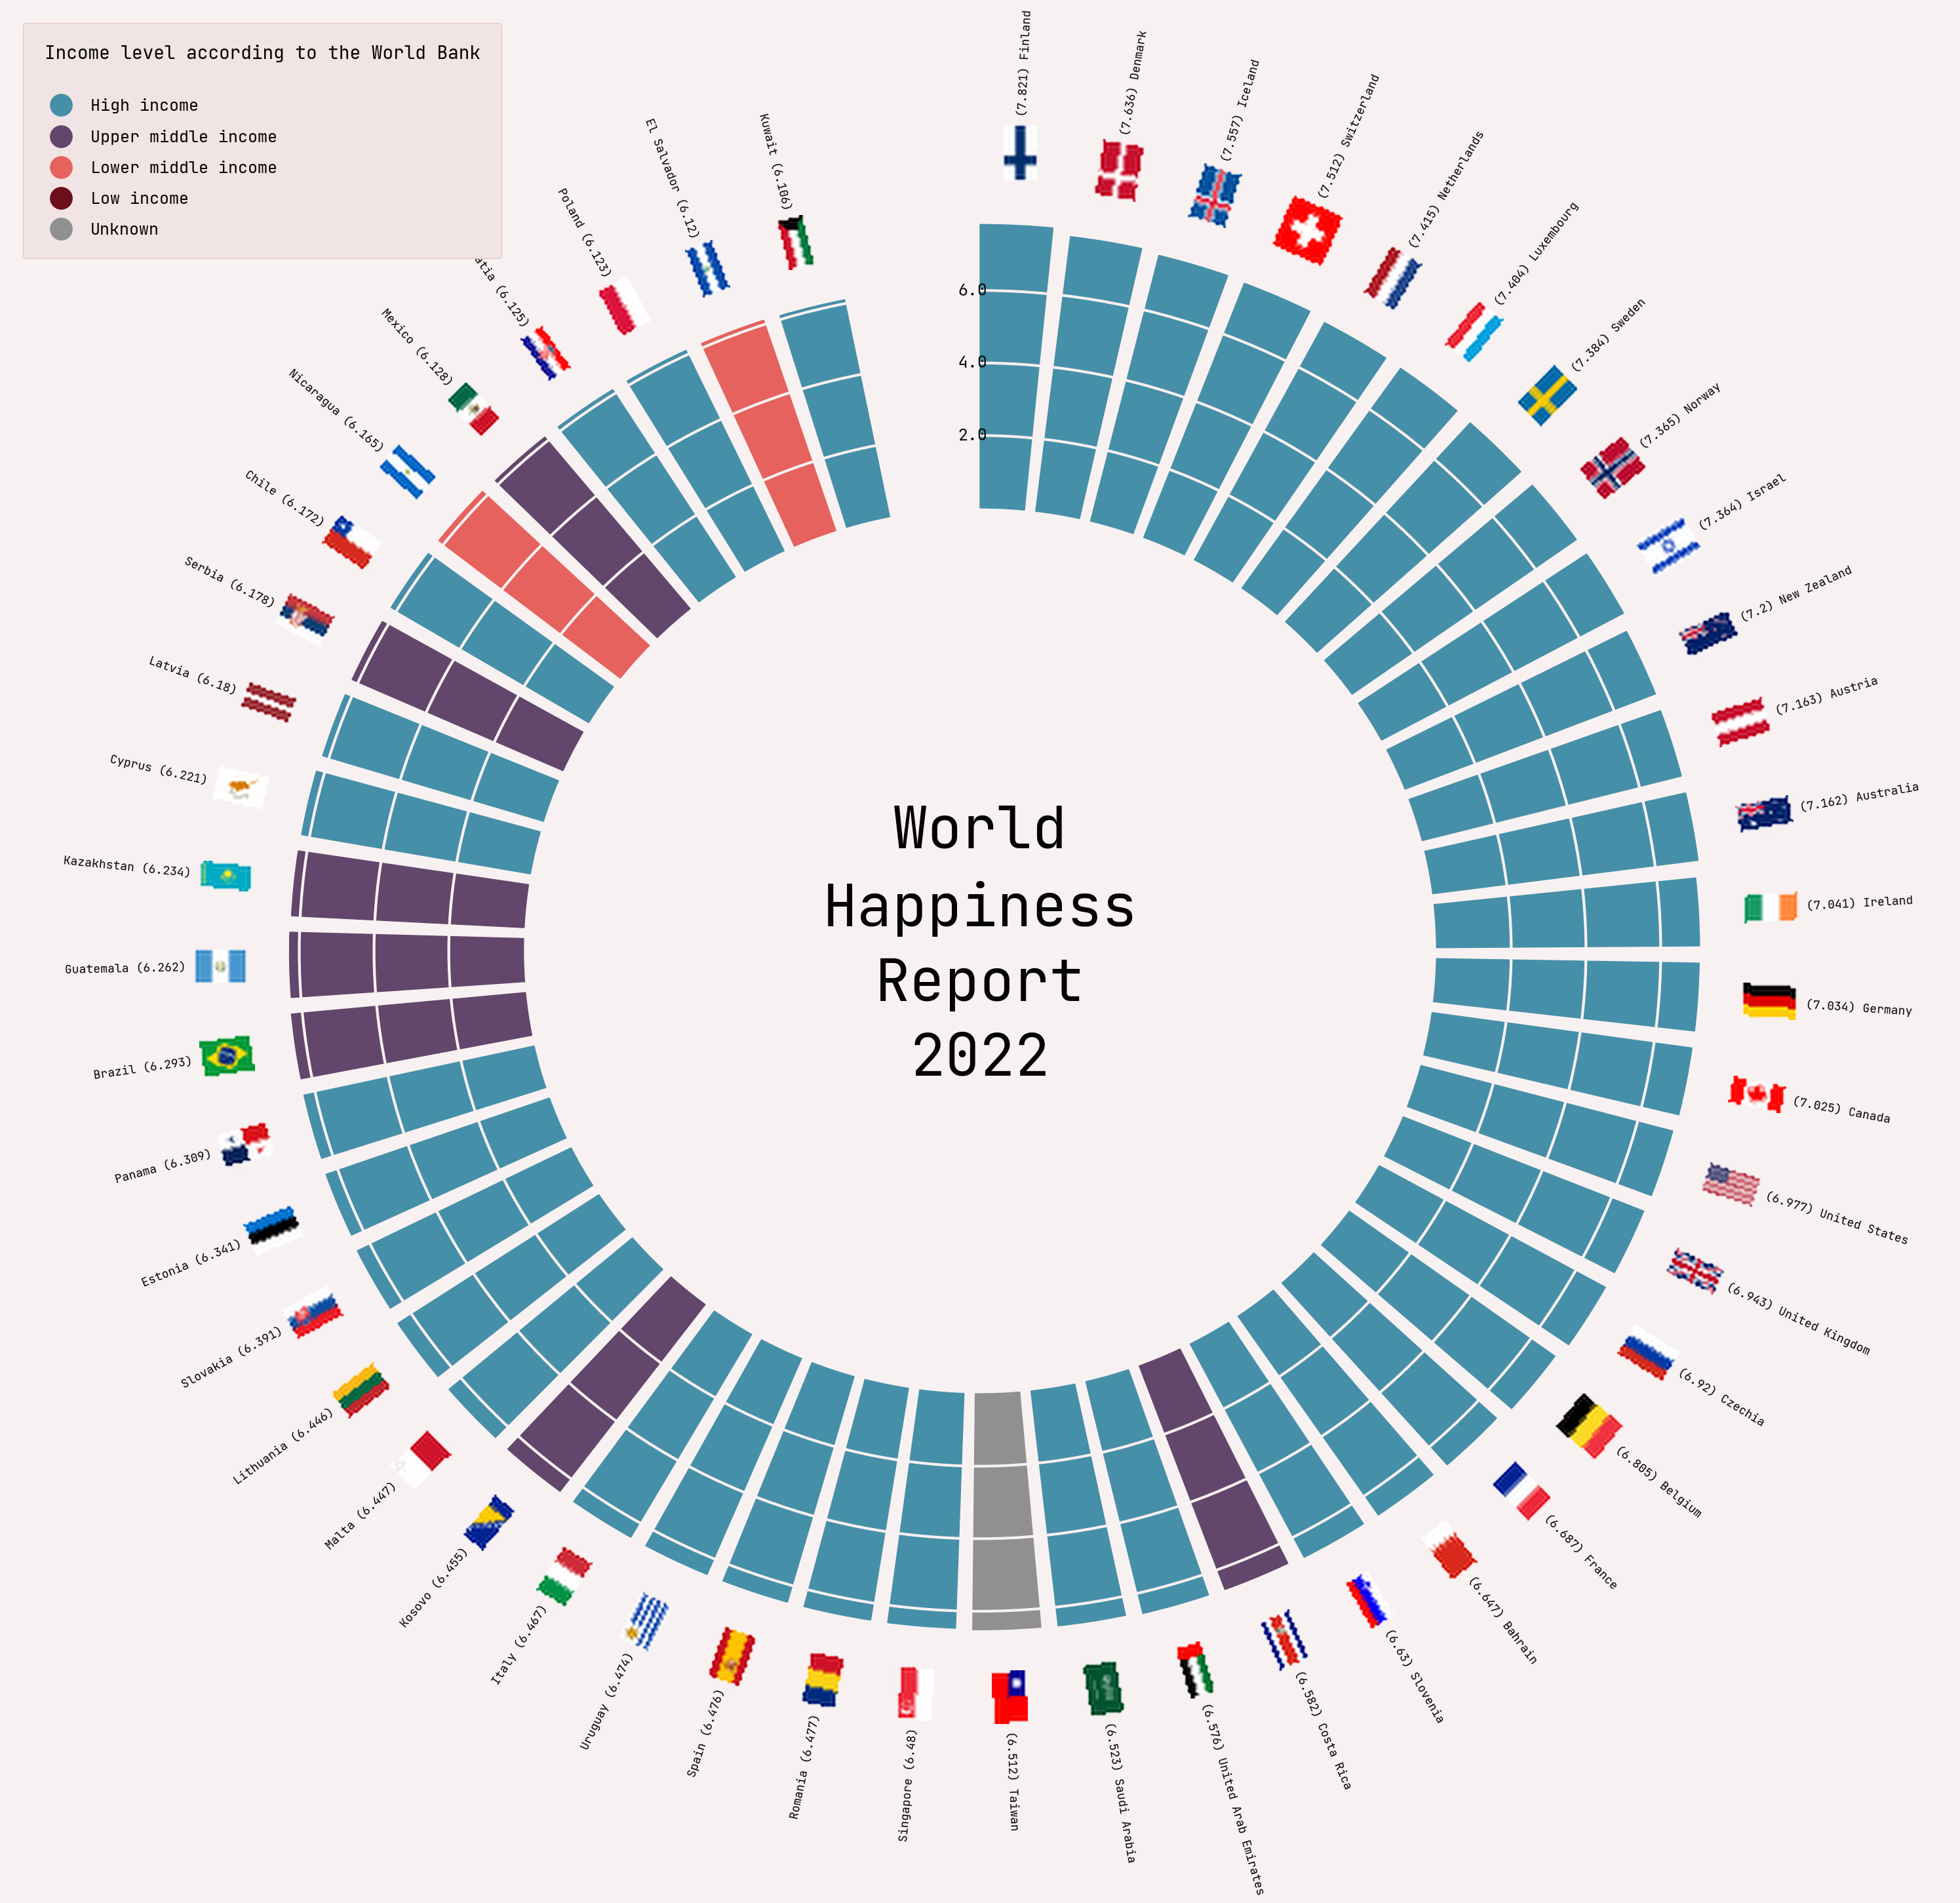

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, (_, row) in enumerate(df.iterrows()):
    item = int(i)
    bar_length = row.score
    name = row.country
    length = bar_length + INNER_PADDING
    start = 100 + (item * SIZE) + PAD
    end = 100 + (item + 1) * SIZE
    angle = (end + start) / 2

    # Create variables here
    flag_zoom = 0.15 * length
    flag_x, flag_y = get_xy_with_padding(length, angle, 0.1 * length)
    text_x, text_y = get_xy_with_padding(length, angle, flag_zoom)

    # Add wedge functions here
    draw_wedge(ax, start, end, length, bar_length, color(row.income))
    add_flag(ax, flag_x, flag_y, row.country, flag_zoom, angle)
    add_text(ax, text_x, text_y, row.country, bar_length, angle)

# Add general functions here
draw_reference_line(ax, 2.0, 0.05, INNER_PADDING)
draw_reference_line(ax, 4.0, 0.05, INNER_PADDING)
draw_reference_line(ax, 6.0, 0.05, INNER_PADDING)

add_legend(
    labels=[
        "High income",
        "Upper middle income",
        "Lower middle income",
        "Low income",
        "Unknown",
    ],
    colors=["#468FA8", "#62466B", "#E5625E", "#6B0F1A", "#909090"],
    title="Income level according to the World Bank\n",
)

plt.title(
    "World Happiness Report 2022".replace(" ", "\n"),
    x=0.5,
    y=0.5,
    va="center",
    ha="center",
    fontsize=64,
    linespacing=1.5,
)

plt.axis("off")
plt.tight_layout()
plt.show()